## Part 1

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

In [7]:
class StandardScaler:
    def fit_transform(self, X):
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0)
        return (X - mean) / std

In [8]:
data = pd.read_csv("diabetes.csv")

In [9]:
features = data.drop('Outcome', axis=1)
target = data['Outcome']

In [10]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [11]:
scaled_data = pd.DataFrame(scaled_features, columns=features.columns)
scaled_data['Outcome'] = target

In [12]:
scaled_data.to_csv('scaled_diabetes.csv', index=False)

In [2]:
diabetes = pd.read_csv("scaled_diabetes.csv")

In [3]:
features = diabetes.drop('Outcome', axis=1)
target = diabetes['Outcome']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [5]:
k_values = list(range(1, 31))
cv_scores = []

In [6]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

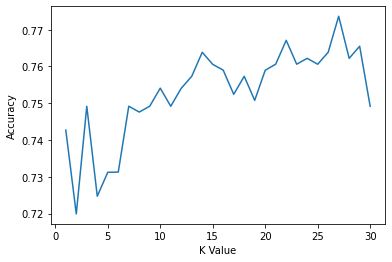

In [7]:
plt.plot(k_values, cv_scores)
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.show()

In [8]:
best_k = k_values[np.argmax(cv_scores)]
print('Best K value:', best_k)

Best K value: 27


In [9]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=27)

In [10]:
y_pred = cross_val_predict(knn, X_train, y_train, cv=5)

In [21]:
cv_scores = cross_val_score(knn, X_train, y_train, cv=5)
print('Mean:', cv_scores.mean())
print('Standard deviation:', cv_scores.std())

Mean: 0.7736505397840864
Standard deviation: 0.018427166767250112


In [16]:
conf_mat = confusion_matrix(y_train, y_pred)
print("Confusion Matrix:\n", conf_mat)

Confusion Matrix:
 [[359  39]
 [100 116]]


The mean is a measure of central tendency that gives an indication of the typical value in a set of data. In the context of model evaluation, the mean can be used to summarize the performance of a model across multiple trials or on a subset of a dataset. For example, if you perform k-fold cross-validation to evaluate the performance of a model, you may report the mean accuracy across the k folds as a summary of the model's performance.
The standard deviation is a measure of how much the values in a set of data vary from the mean. In the context of model evaluation, the standard deviation can be used to assess the variability in the model's performance across multiple trials or on a subset of a dataset. A high standard deviation indicates that the model's performance varies widely, while a low standard deviation indicates that the model's performance is consistent.
A confusion matrix is a table that summarizes the number of true positive, true negative, false positive, and false negative predictions made by a model on a dataset. It is used to evaluate the performance of a model on a binary classification task, where the goal is to predict one of two classes. The confusion matrix allows you to calculate various performance metrics such as accuracy, precision, recall, and F1-score.

The mean of this model is 0.7736505397840864.
The standard deviation is 0.018427166767250112
The confusion matrix is
[359  39]
[100 116]

## Part 2

In [7]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

In [3]:
diabetes = pd.read_csv("diabetes.csv")

In [4]:
features = diabetes.drop('Outcome', axis=1)
target = diabetes['Outcome']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [6]:
gaussian_clf = GaussianNB()
multinomial_clf = MultinomialNB()
bernoulli_clf = BernoulliNB()

In [8]:
n_folds = 5

In [9]:
gaussian_scores = cross_val_score(gaussian_clf, X_train, y_train, cv=n_folds)
multinomial_scores = cross_val_score(multinomial_clf, X_train, y_train, cv=n_folds)
bernoulli_scores = cross_val_score(bernoulli_clf, X_train, y_train, cv=n_folds)

In [10]:
print("Mean accuracy of GaussianNB: {:.2f} (std: {:.2f})".format(gaussian_scores.mean(), gaussian_scores.std()))
print("Mean accuracy of MultinomialNB: {:.2f} (std: {:.2f})".format(multinomial_scores.mean(), multinomial_scores.std()))
print("Mean accuracy of BernoulliNB: {:.2f} (std: {:.2f})".format(bernoulli_scores.mean(), bernoulli_scores.std()))

Mean accuracy of GaussianNB: 0.76 (std: 0.03)
Mean accuracy of MultinomialNB: 0.59 (std: 0.06)
Mean accuracy of BernoulliNB: 0.64 (std: 0.02)


In [11]:
gaussian_clf.fit(X_train, y_train)
multinomial_clf.fit(X_train, y_train)
bernoulli_clf.fit(X_train, y_train)

BernoulliNB()

In [12]:
y_pred_gaussian = gaussian_clf.predict(X_test)
y_pred_multinomial = multinomial_clf.predict(X_test)
y_pred_bernoulli = bernoulli_clf.predict(X_test)

In [13]:
acc_gaussian = accuracy_score(y_test, y_pred_gaussian)
acc_multinomial = accuracy_score(y_test, y_pred_multinomial)
acc_bernoulli = accuracy_score(y_test, y_pred_bernoulli)

In [14]:
print("Accuracy of GaussianNB on testing data: {:.2f}".format(acc_gaussian))
print("Accuracy of MultinomialNB on testing data: {:.2f}".format(acc_multinomial))
print("Accuracy of BernoulliNB on testing data: {:.2f}".format(acc_bernoulli))

Accuracy of GaussianNB on testing data: 0.73
Accuracy of MultinomialNB on testing data: 0.66
Accuracy of BernoulliNB on testing data: 0.65


Mean and standard deviation of GaussianNB: 0.76 and 0.03
Mean and standard deviation of MultinomialNB: 0.59 and 0.06
Mean and standard deviation of BernoulliNB: 0.64 and std: 0.02

GaussianNB has highest mean and lowest standard deviation

Accuracy of GaussianNB on testing data: 0.73
Accuracy of MultinomialNB on testing data: 0.66
Accuracy of BernoulliNB on testing data: 0.65

GaussianNB has highest score.

GaussianNB fits best

## Part 3

In [20]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import LeaveOneOut, cross_val_score

In [19]:
scaled_diabetes = pd.read_csv("scaled_diabetes.csv")
diabetes = pd.read_csv("diabetes.csv")

In [22]:
X = scaled_diabetes.drop('Outcome', axis=1).values
y = scaled_diabetes['Outcome'].values

In [23]:
knn_clf = KNeighborsClassifier()

In [24]:
loo = LeaveOneOut()

In [25]:
knn_scores = cross_val_score(knn_clf, X, y, cv=loo)

In [26]:
print("Mean accuracy of KNN classifier: {:.2f} (std: {:.2f})".format(np.mean(knn_scores), np.std(knn_scores)))

Mean accuracy of KNN classifier: 0.74 (std: 0.44)


In [27]:
X = diabetes.drop('Outcome', axis=1).values
y = diabetes['Outcome'].values

In [28]:
gaussian_clf = GaussianNB()

In [29]:
gaussian_scores = cross_val_score(gaussian_clf, X, y, cv=loo)

In [30]:
print("Mean accuracy of GaussianNB classifier: {:.2f} (std: {:.2f})".format(np.mean(gaussian_scores), np.std(gaussian_scores)))

Mean accuracy of GaussianNB classifier: 0.75 (std: 0.43)


### During Run Time:

KNN: The run time for KNN is dependent on the size of the training set, the number of features, and the value of the K hyperparameter. If the training set is very large, KNN can be slow and computationally intensive. However, it is a simple algorithm that can be parallelized, so it can scale well to large datasets. The choice of the K hyperparameter can also have an impact on run time and accuracy. A larger value of K may improve accuracy but also increase run time, while a smaller value of K may reduce run time but also decrease accuracy.
GaussianNB: The run time for GaussianNB is typically very fast since it only needs to compute the mean and variance of each feature for each class. However, if there are many features or if the data is very high-dimensional, the algorithm may become slow and suffer from the curse of dimensionality. In general, GaussianNB is a simple and fast algorithm that can be efficient for small to moderate sized datasets.

### During Testing Time:

KNN: The testing time for KNN is dependent on the size of the test set and the number of features. In general, KNN has a fast testing time since it only needs to compare each test instance to the training instances to find the K nearest neighbors. However, if the number of features is very large, the algorithm may become slow and suffer from the curse of dimensionality. Additionally, the choice of the K hyperparameter can have an impact on testing time and accuracy, as discussed above.
GaussianNB: The testing time for GaussianNB is typically very fast since it only needs to compute the probability of each class given the test instance. In general, GaussianNB has a fast testing time for small to moderate sized datasets.

In summary, the run time and testing time of the KNN and GaussianNB classifiers depend on various factors such as the size of the dataset, the number of features, and the choice of hyperparameters. It is important to carefully evaluate the performance of these classifiers and tune their hyperparameters to optimize their accuracy and speed.

## Part 4

To determine whether KNN or Naive Bayes works best with the Pima Indians Diabetes Database, we would need to evaluate the performance of each algorithm using appropriate evaluation metrics and compare their results.

In general, KNN can perform well on datasets where instances that are close to each other in feature space tend to have the same class label. However, KNN can be sensitive to irrelevant features and may struggle with high-dimensional data. It can also be computationally expensive to train and test on large datasets.

On the other hand, Naive Bayes is a simple and fast algorithm that can perform well on datasets with discrete and continuous features. It assumes that the features are conditionally independent given the class label, which can be a strong assumption in some cases. Naive Bayes can also be sensitive to imbalanced class distributions and may struggle with rare classes.

Given the nature of the Pima Indians Diabetes Dataset, which has both discrete and continuous features, and a moderately imbalanced class distribution, both KNN and Naive Bayes could potentially work well. However, without evaluating the performance of each algorithm on this specific dataset, it is impossible to say for certain which one works best.

Therefore, I recommend evaluating the performance of both KNN and Naive Bayes using appropriate evaluation metrics such as accuracy, precision, recall, F1-score, and AUC-ROC. It is also important to use cross-validation to ensure that the results are robust and not overfit to the training data. Based on the evaluation results, you can then determine which algorithm works best for this particular dataset.

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import  accuracy_score

In [0]:
diabetes = pd.read_csv("diabetes.csv")

In [4]:
X = diabetes.drop('Outcome', axis=1).values
y = diabetes['Outcome'].values

In [5]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=42)

In [9]:
gnb = GaussianNB()
X_trainval = np.concatenate((X_train, X_val))
y_trainval = np.concatenate((y_train, y_val))
gnb.fit(X_trainval, y_trainval)
y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set: {:.3f}".format(accuracy))

Accuracy on test set: 0.766


In [10]:
gnb = GaussianNB()
gnb.fit(X, y)

GaussianNB()